### NetworkX 

a rapid thematic analysis of a small corpus. For more information. We start by word coulds of each chapters and then we aim to use graph presentation of data.



 


## Imports

In [2]:
import os
import numpy as np
import pandas as pd
#import tensorflow as tf  # conda install -c conda-forge tensorflow 
#import tensorflow_hub as hub  #-c conda-forge tensorflow-hub
from sklearn import preprocessing 
#nlp = spacy.load('en_core_web_md')
from IPython.display import HTML
import logging
#logging.getLogger('tensorflow').disabled = True #OPTIONAL - to disable outputs from Tensorflow


## Data 



Please download the data '01_df_v013.pickle' in github on  your local machine from  this directory :<br />
 https://github.com/grasshoff/vorlesung2019/tree/master/notebooks/yeghaneh/data
 <br /><br />
The data 01_df_v013 is annotated (labeled) data of english version of well-known kepler's book: New Astronomy (Latin: Astronomia nova). You can find that in the repository.


In [3]:
importVersion = '013'  # The  desired version pickle-file of your data (now we are working on version 013 of our data)

In [4]:
path= '../data/01_df_v{0}.pickle'.format(importVersion) # Put the path of the data in your local machine here, consider the letter "r" before the path

### Pre-processing

In [5]:
dfAstroNova = pd.read_pickle(path)# The data  is saved as a pickle file. We read it as a pandas dataFrame
type(dfAstroNova)  

pandas.core.frame.DataFrame

In [6]:
 # Sort the data based on the chapters of the book. 
dfAstroNova['chapter'] = dfAstroNova.chapter.replace("appendix b",np.nan).astype(float)  
dfAstroNova = dfAstroNova.rename_axis('MyIdx').sort_values(by = ['chapter', 'MyIdx'], ascending = [True, True])
dfAstroNova.chapter.fillna('appendix b', inplace=True)

In [7]:
len(dfAstroNova)   # Number of rows.

1605

In [8]:
dfAstroNova.head(5)  

,html,text,links,italic,chapter,graphic,table,marginal,sentences,tagged
MyIdx,,,,,,,,,,
18,"<p><span class=""anchor"" id=""bookmark0""></span>...",Chapter 1,[],[],1,[],[],[],[Chapter 1],"[[(Chapter, None), (1, NUM)]]"
19,"<p><span class=""anchor"" id=""bookmark1""></span>...",On the distinction between the first motion an...,[],[],1,[],[],[],[On the distinction between the first motion a...,"[[(On, None), (the, None), (distinction, None)..."
20,<p>The testimony of the ages confirms that the...,The testimony of the ages confirms that the mo...,[],[],1,[],[],[ Terms: 1. The first motion is that of the wh...,[The testimony of the ages confirms that the m...,"[[(The, None), (testimony, None), (of, None), ..."
21,"<p><img height=""382"" src=""media/image1.jpeg"" w...",It is just this from which astronomy arose amo...,[],[],1,[ ch 1 gr 1],[],[],[It is just this from which astronomy arose am...,"[[(It, None), (is, None), (just, None), (this,..."
22,<p>Before the distinction between the first mo...,Before the distinction between the first motio...,[],[(such],1,[],[],[ 2],[Before the distinction between the first moti...,"[[(Before, None), (the, None), (distinction, N..."


In [9]:
texts=[]
for sen in dfAstroNova.sentences:
    texts +=sen

In [10]:
type(texts)

list

In [11]:
str1 = ''.join(texts)

# All Chapters

In [12]:
#Word cloud
from os import path  
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
stopwords=set(STOPWORDS)
stop_words=stopwords.union(["Therefore","But" ,"would" ,"but", "also", "let", 'I' , 'And',  'For', 'A' ,'The','will','now'])
wordcloud = WordCloud(background_color="white", max_words=2000,
               stopwords=stop_words, contour_width=3, contour_color='steelblue' )
wc=wordcloud.generate(str1)
print(wc)
fig = plt.figure(figsize=(10,15))
plt.imshow(wc)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1800)

<Figure size 1000x1500 with 1 Axes>

In [13]:
def chapter_wordcloud(chapter_number):
    df=dfAstroNova[dfAstroNova.chapter==chapter_number]
    texts=[]
    for sen in df.sentences:
        texts +=sen
    stopwords=set(STOPWORDS)
    stop_words=stopwords.union(["Therefore","But" ,"would" ,"but", "also", "let", 'I' , 'And',  'For', 'A' ,'The','will','now'])
    str2 = ''.join(texts)
    wordcloud = WordCloud(background_color="white", max_words=2000,
                   stopwords=stop_words, contour_width=3, contour_color='steelblue' )
    wc=wordcloud.generate(str2)
    print(wc)

    fig = plt.figure(figsize=(20,30))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    name='WordCloudCloud{0}.png'.format(chapter_number)
    fig.savefig(name, dpi=600)
    return 


# Chapter 4

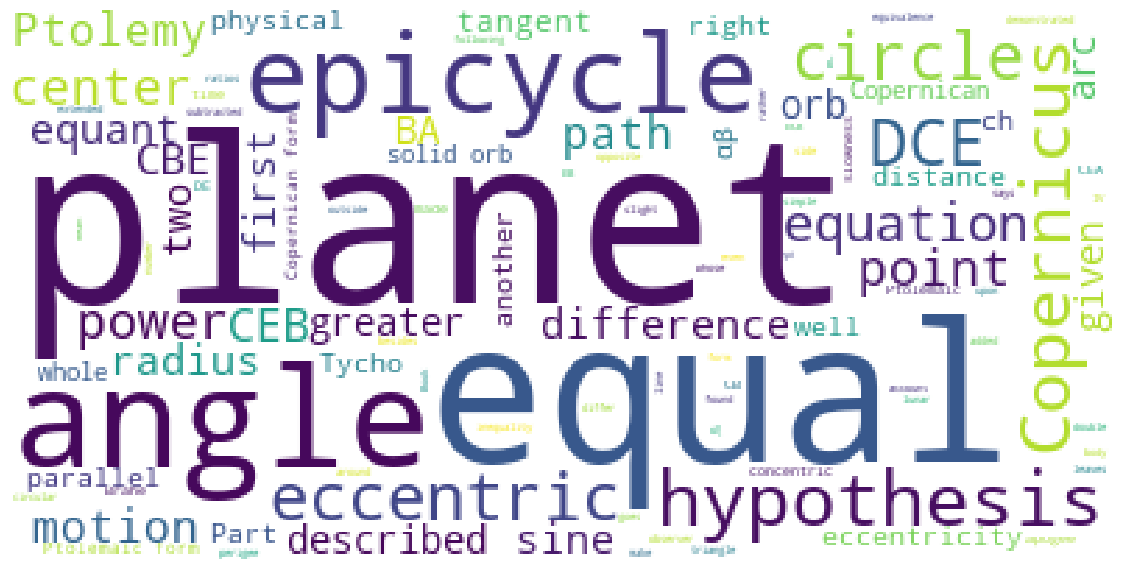

In [14]:
chapter_wordcloud(4)

# Chapter 10

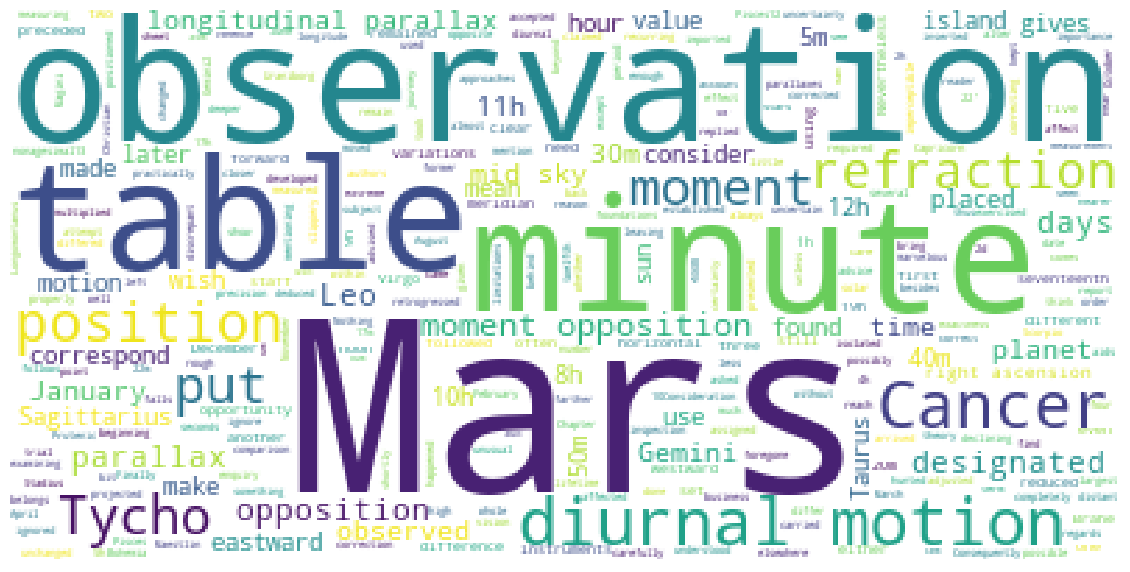

In [15]:
chapter_wordcloud(10)

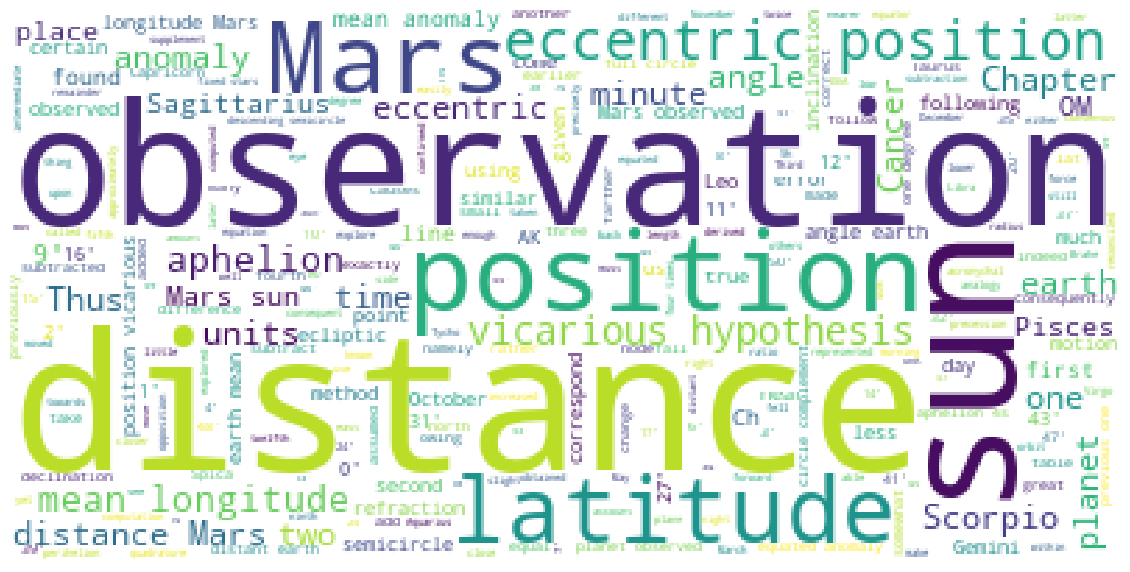

In [25]:
chapter_wordcloud(51)